# **Cifar 100 Image Classification Using CNN**

The project aims to build a Convolutional Neural Network based architecture to classify images from cifar-100 dataset. We'll try to build two basic CNN(with a slight difference of filters in Conv2D layers) and a deeper CNN and finally explore how complexity impacts the performance of models.

### **Steps:**
**1. Dataset Setup**
  * Import required libraries
  * Load Cifar-100 dataset
  * Preprocess the data(normalize images and reshape images if required, encode labels)
  * Verify the shapes of processed data.

**2. Model Building**
  * Define the architecture of each model
    * Basic CNN-1 (32-64 filters)
    * Basic CNN-2 (64-128 filters)
    * Deeper CNN

**3. Model Training**
  * Train each model using the prepared training data.
  * Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

**4. Model Evaluation**
  * Load the best weights for each trained model.
  * Evaluate each model's performance on the test set using metrics like loss and accuracy.
  * Visualize the training history (accuracy and loss curves) for comparison.
  * Generate and visualize confusion matrices to understand model performance on each class.

**5. Prediction Analysis**
  * Use the best performing model to make predictions on the test case.
  * Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behaviour.

# **1. Dataset Setup**

## **1.1. Import Libraries**

In [1]:
import keras

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

## **1.2. Load Dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]], dtype=uint8)
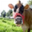

In [5]:
train_images[0]

## **1.3. Normalize Data**

In [6]:
# Normalize image data
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

## **1.4. One Hot Encode Labels**

In [7]:
encoded_train_labels = keras.utils.to_categorical(train_labels, num_classes=100)
encoded_test_labels = keras.utils.to_categorical(test_labels, num_classes=100)

## **1.5. Verify Dataset Shape**

In [8]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", encoded_train_labels.shape)
print("Testing labels shape:", encoded_test_labels.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


# **2. Model Building**

## **2.1. Basic CNN 1 (32-64)**

- **Conv2D (32, 3×3) + MaxPool** → 896 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 147,520 params  
- **Dense (100, Softmax)** → 6500 params  

**Total params:** ~173K  

In [15]:
basic_cnn_1 = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),  # Use Input layer
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
    ])

basic_cnn_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

basic_cnn_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

## **2.2. Basic CNN 2 (64-128)**

- **Conv2D (64, 3×3) + MaxPool** → 1792 params  
- **Conv2D (128, 3×3) + MaxPool** → 73856 params  
- **Flatten**  
- **Dense (64, ReLU)** → 294,976 params  
- **Dense (100, Softmax)** → 6500 params  

**Total params:** ~377k  

In [10]:
basic_cnn_2 = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
    ])

basic_cnn_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

basic_cnn_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377,124 (1.44 MB)

 Trainable params: 377,124 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

## **2.3. Deeper CNN**

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 896 + 128 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 256 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 512 params
- **Conv2D (256, 3×3) + BN + MaxPool + Dropout** → 131,328 + 1024 params  
- **Flatten**  
- **Dense (256, ReLU) + BN + Dropout** → 65,792 + 1024 params  
- **Dense (100, Softmax)** → 25,700 params  

**Total params:** ~319k

In [11]:
deeper_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(256, (2, 2), activation='relu'), # Ensure kernel size is (2,2)
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax')
    ])

deeper_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

deeper_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 1, 1, 256)      │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,012 (1.22 MB)

 Trainable params: 317,540 (1.21 MB)

 Non-trainable params: 1,472 (5.75 KB)

## **3. Model Training**

## **3.1. Training Basic CNN 1 (32-64)**

- **ModelCheckpoint**: saves best Basic CNN weights (`basic_cnn_1.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 30  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint_basic_cnn_1 = keras.callbacks.ModelCheckpoint(
    filepath='basic_cnn_1.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1)

print('Training basic cnn model...')
basic_cnn_1_history=basic_cnn_1.fit(
    train_images_normalized,
    encoded_train_labels,
    epochs=30,
    batch_size=30,
    validation_data=(test_images_normalized, encoded_test_labels), # Use normalized test images
    callbacks=[early_stopping, model_checkpoint_basic_cnn_1])

print('Basic CNN Model training finished.')

Training basic cnn model...
Epoch 1/30
1666/1667 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0671 - loss: 4.1695
Epoch 1: val_loss improved from inf to 3.34234, saving model to basic_cnn_1.weights.h5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.0671 - loss: 4.1691 - val_accuracy: 0.2030 - val_loss: 3.3423
Epoch 2/30
1666/1667 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2256 - loss: 3.1852
Epoch 2: val_loss improved from 3.34234 to 2.96123, saving model to basic_cnn_1.weights.h5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.2256 - loss: 3.1851 - val_accuracy: 0.2749 - val_loss: 2.9612
Epoch 3/30
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2951 - loss: 2.8324
Epoch 3: val_loss improved from 2.96123 to 2.77085, saving model to basic_cnn_1.weights.h5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.2951 - loss: 2.8324 - val_accuracy: 0.3091 - val_loss: 2.7709
Epoch 4/30
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3384

## **3.2. Training Basic CNN 2 (64-128)**

- **ModelCheckpoint**: saves best Basic CNN weights (`basic_cnn_2.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint_basic_cnn_2 = keras.callbacks.ModelCheckpoint(
    filepath='basic_cnn_2.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1)

print('Training basic cnn model...')
basic_cnn_2_history=basic_cnn_2.fit(
    train_images_normalized,
    encoded_train_labels,
    epochs=30,
    batch_size=64,
    validation_data=(test_images_normalized, encoded_test_labels), # Use normalized test images
    callbacks=[early_stopping, model_checkpoint_basic_cnn_2])

print('Basic CNN Model training finished.')

Training basic cnn model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.0466 - loss: 4.3182
Epoch 1: val_loss improved from inf to 3.72157, saving model to basic_cnn_2.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 132s 167ms/step - accuracy: 0.0466 - loss: 4.3179 - val_accuracy: 0.1322 - val_loss: 3.7216
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.1734 - loss: 3.4713
Epoch 2: val_loss improved from 3.72157 to 3.34656, saving model to basic_cnn_2.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 166ms/step - accuracy: 0.1735 - loss: 3.4712 - val_accuracy: 0.1985 - val_loss: 3.3466
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.2357 - loss: 3.1302
Epoch 3: val_loss improved from 3.34656 to 3.00322, saving model to basic_cnn_2.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 167ms/step - accuracy: 0.2357 - loss: 3.1301 - val_accuracy: 0.2634 - val_loss: 3.0032
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.2752 - l

## **3.3. Training Deeper CNN**

- **ModelCheckpoint**: saves best Basic CNN weights (`deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='deeper_cnn.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn.fit(
    train_images_normalized, # Use normalized images
    encoded_train_labels,
    epochs=30,
    batch_size=64,
    validation_data=(test_images_normalized, encoded_test_labels), # Use normalized images
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.0512 - loss: 4.7237
Epoch 1: val_loss improved from inf to 3.69145, saving model to deeper_cnn.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 135ms/step - accuracy: 0.0513 - loss: 4.7225 - val_accuracy: 0.1275 - val_loss: 3.6914
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.1446 - loss: 3.6558
Epoch 2: val_loss improved from 3.69145 to 3.35670, saving model to deeper_cnn.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 134ms/step - accuracy: 0.1446 - loss: 3.6556 - val_accuracy: 0.1881 - val_loss: 3.3567
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.1918 - loss: 3.3206
Epoch 3: val_loss improved from 3.35670 to 3.19139, saving model to deeper_cnn.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 133ms/step - accuracy: 0.1918 - loss: 3.3204 - val_accuracy: 0.2268 - val_loss: 3.1914
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2348 - los

# **4. Model Evaluation**

## **4.1. Model Evaluation Code Explanation**

Import utilities → Load weights (Basic CNN 1, Basic CNN 2, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/tmp/ipython-input-898631314.py:40: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


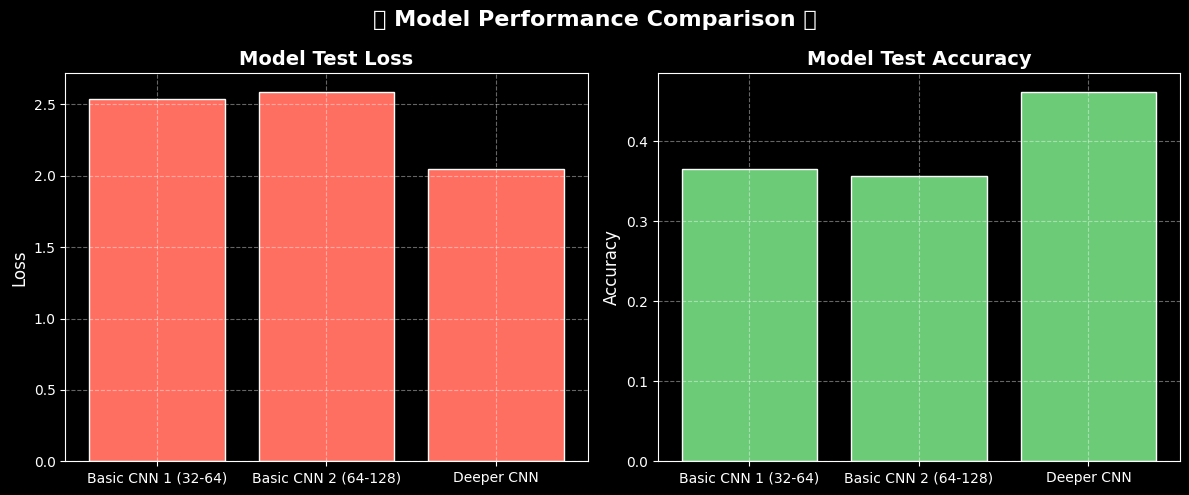

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load weights, explicitly excluding optimizer state to suppress warnings
basic_cnn_1.load_weights('basic_cnn_1.weights.h5')
basic_cnn_2.load_weights('basic_cnn_2.weights.h5')
deeper_cnn.load_weights('deeper_cnn.weights.h5')

loss_basic_cnn_1, accuracy_basic_cnn_1 = basic_cnn_1.evaluate(test_images_normalized, encoded_test_labels, verbose=0)
loss_basic_cnn_2, accuracy_basic_cnn_2 = basic_cnn_2.evaluate(test_images_normalized, encoded_test_labels, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn.evaluate(test_images_normalized, encoded_test_labels, verbose=0)


# Data
models = ['Basic CNN 1 (32-64)', 'Basic CNN 2 (64-128)', 'Deeper CNN']
losses = [loss_basic_cnn_1, loss_basic_cnn_2, loss_deeper_cnn]
accuracies = [accuracy_basic_cnn_1, accuracy_basic_cnn_2, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## **4.2. Confusion Matrix and Report**

- Predict test images (Basic CNN 1, Basic CNN 2, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model

**Note: We will plot confusion matrix only for first 10 labels to ensure readability.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


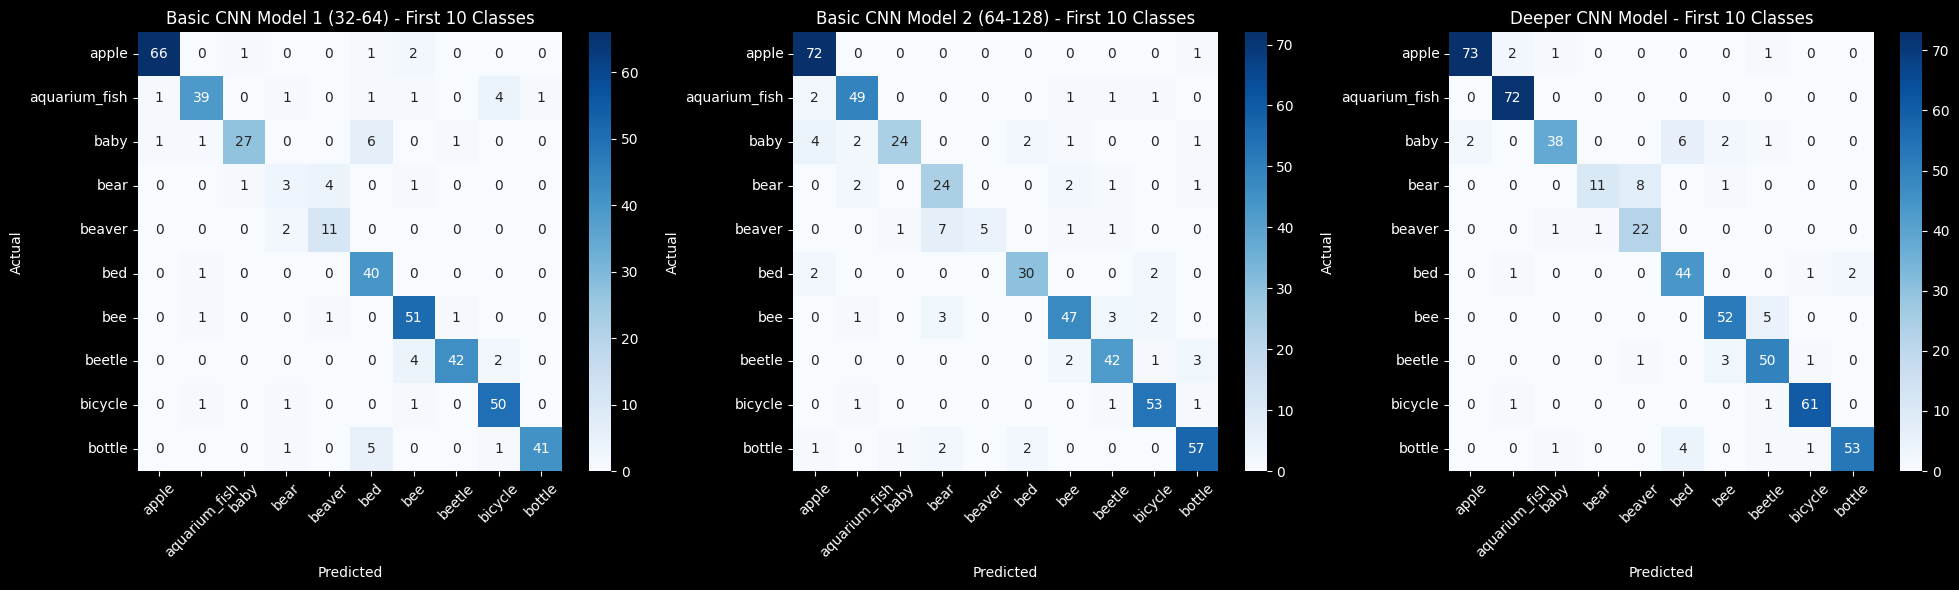

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf # Import tensorflow to access cifar100_classes if needed

# Ensure models are loaded and normalized test images are available
if 'basic_cnn_1' not in globals() or 'basic_cnn_2' not in globals() or 'deeper_cnn' not in globals() or 'test_images_normalized' not in globals() or 'encoded_test_labels' not in globals():
    print("Error: Models or normalized test images/labels not found. Please ensure previous cells are run.")
else:
    # Predictions
    basic_cnn_1_predictions = basic_cnn_1.predict(test_images_normalized)
    basic_cnn_2_predictions = basic_cnn_2.predict(test_images_normalized)
    deeper_cnn_predictions = deeper_cnn.predict(test_images_normalized)

    # Convert labels
    test_labels_int = np.argmax(encoded_test_labels, axis=1)

    basic_cnn_1_predicted_labels = np.argmax(basic_cnn_1_predictions, axis=1)
    basic_cnn_2_predicted_labels = np.argmax(basic_cnn_2_predictions, axis=1)
    deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

    # ---- Define subset of classes (first 10) ----
    subset_classes = list(range(10))  # 0-9
    mask = np.isin(test_labels_int, subset_classes)

    # ---- Filter labels and predictions for these classes ----
    test_labels_subset = test_labels_int[mask]

    basic_cnn_1_predicted_labels_subset = basic_cnn_1_predicted_labels[mask]
    basic_cnn_2_predicted_labels_subset = basic_cnn_2_predicted_labels[mask]
    deeper_cnn_predicted_labels_subset = deeper_cnn_predicted_labels[mask]

    # ---- Corrected CIFAR-100 fine label names (100 classes) ----
    cifar100_classes = [
        'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
        'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
        'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
        'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
        'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
        'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
        'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
        'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
        'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
        'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
    ]


    class_names_subset = [cifar100_classes[i] for i in subset_classes]

    # ---- Compute confusion matrices for the subset of classes ----
    cm_basic_cnn_1_subset = confusion_matrix(test_labels_subset, basic_cnn_1_predicted_labels_subset, labels=subset_classes)
    cm_basic_cnn_2_subset = confusion_matrix(test_labels_subset, basic_cnn_2_predicted_labels_subset, labels=subset_classes)
    cm_deeper_cnn_subset = confusion_matrix(test_labels_subset, deeper_cnn_predicted_labels_subset, labels=subset_classes)

    # ---- Plot side-by-side confusion matrices for the subset ----
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    sns.heatmap(cm_basic_cnn_1_subset, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names_subset, yticklabels=class_names_subset, ax=axes[0])
    axes[0].set_title("Basic CNN Model 1 (32-64) - First 10 Classes")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    axes[0].tick_params(axis='x', rotation=45)

    sns.heatmap(cm_basic_cnn_2_subset, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names_subset, yticklabels=class_names_subset, ax=axes[1])
    axes[1].set_title("Basic CNN Model 2 (64-128) - First 10 Classes")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    axes[1].tick_params(axis='x', rotation=45)

    sns.heatmap(cm_deeper_cnn_subset, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names_subset, yticklabels=class_names_subset, ax=axes[2])
    axes[2].set_title("Deeper CNN Model - First 10 Classes")
    axes[2].set_xlabel("Predicted")
    axes[2].set_ylabel("Actual")
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


## **4.3. Model Comparison**


- Created a dataframe to store **test loss** and **test accuracy** for Basic CNN 1, Basic CNN 2, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "Basic CNN 1": ("cyan", basic_cnn_1_history),
    "Basic CNN 2": ("magenta", basic_cnn_2_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['Basic CNN 1', 'Basic CNN 2', 'Deeper CNN'],
    'Test Loss': [loss_basic_cnn_1, loss_basic_cnn_2, loss_deeper_cnn],
    'Test Accuracy': [accuracy_basic_cnn_1, accuracy_basic_cnn_2, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

# **5. Predictions**

This code:
- Uses the trained **Deeper CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


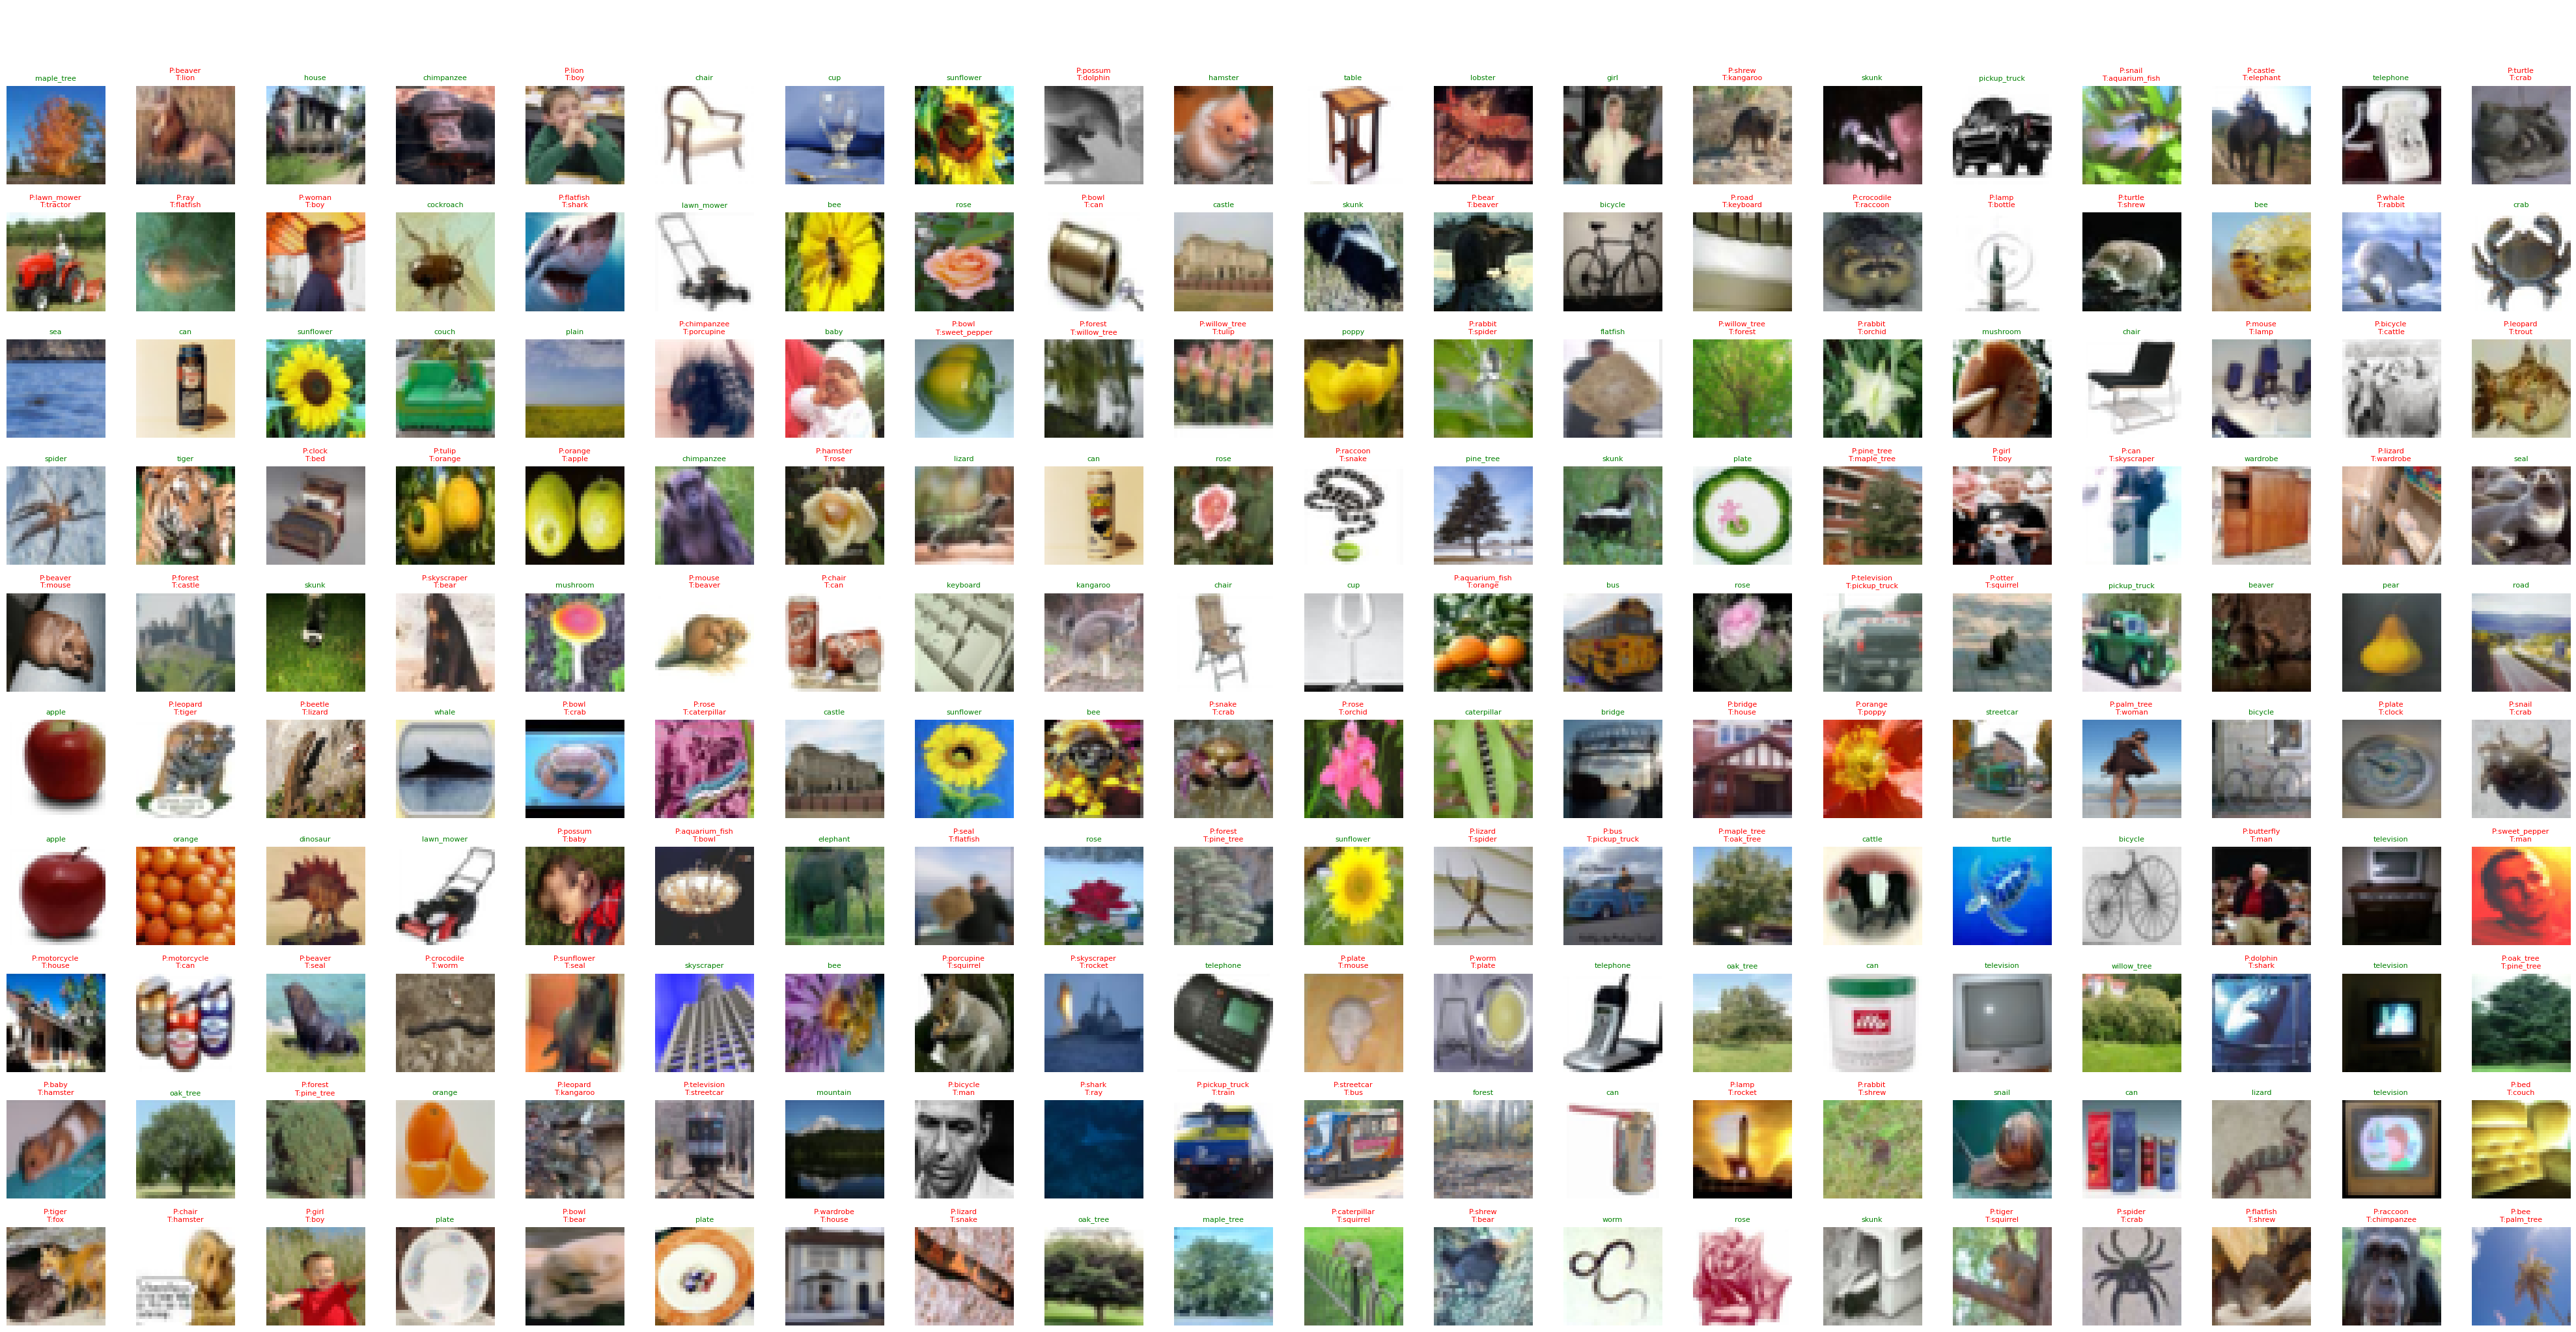

In [ ]:
deeper_cnn_predictions = deeper_cnn.predict(test_images_normalized) # Use normalized images for prediction
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(deeper_cnn_predicted_labels == test_labels.flatten())[0] # Flatten test_labels
incorrectly_classified_indices = np.where(deeper_cnn_predicted_labels != test_labels.flatten())[0] # Flatten test_labels


# Define class names for CIFAR-100 (Using the complete list from earlier cells)
cifar100_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))

# Set the background color of the figure to white
fig.patch.set_facecolor('white')

fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx]) # Removed reshape and cmap='gray'

    pred = cifar100_classes[deeper_cnn_predicted_labels[idx]] # Use cifar100_classes
    true = cifar100_classes[test_labels.flatten()[idx]] # Use cifar100_classes and flatten test_labels

    if deeper_cnn_predicted_labels[idx] == test_labels.flatten()[idx]: # Flatten test_labels for comparison
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## **5.1. Inferencing**

In this step we will take some totally new images outside the dataset and will try to make predictions for them using Deeper CNN model.

Inference Images:


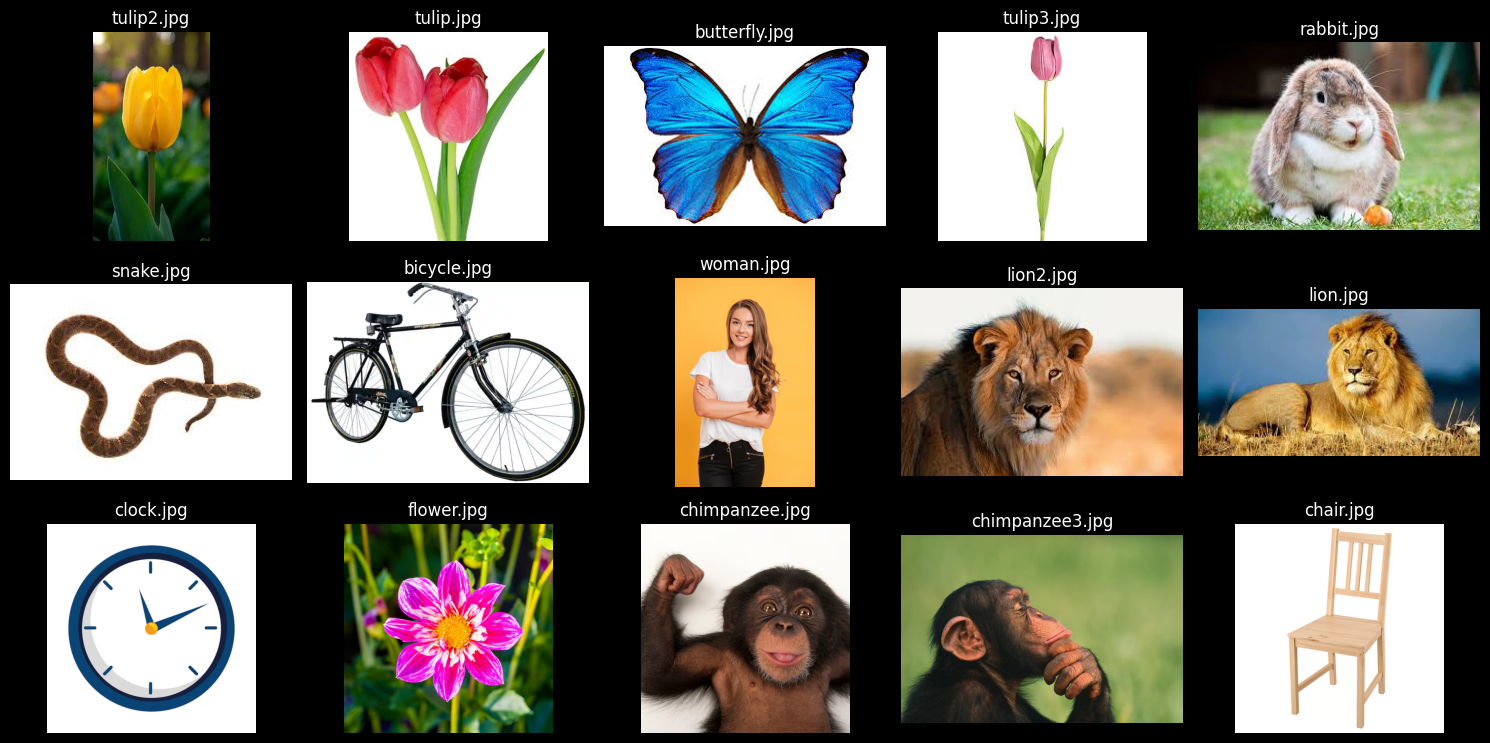

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

folder_path = 'inference_images'

if not os.path.exists(folder_path):
    print(f"Error: The folder '{folder_path}' does not exist.")
else:
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    if not image_files:
        print(f"No image files found in the folder '{folder_path}'.")
    else:
        print(f"Inference Images:")
        plt.figure(figsize=(15, 10))
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            try:
                img = Image.open(image_path)
                plt.subplot(len(image_files) // 5 + 1, 5, i + 1) # Adjust subplot grid as needed
                plt.imshow(img)
                plt.title(image_file)
                plt.axis('off')
            except Exception as e:
                print(f"Could not open or display image '{image_file}': {e}")

        plt.tight_layout()
        plt.show()

### **Preprocessing Inference Images**

In [ ]:
import os
from PIL import Image
import numpy as np

folder_path = 'inference_images'

if not os.path.exists(folder_path):
    print(f"Error: The folder '{folder_path}' does not exist.")
else:
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    if not image_files:
        print(f"No image files found in the folder '{folder_path}'.")
    else:
        print(f"Processing and normalizing images from '{folder_path}':")
        try:
            normalized_inference_images = np.array([
                np.array(Image.open(os.path.join(folder_path, f)).resize((32, 32))).astype('float32') / 255.0
                for f in image_files
            ])
            inference_image_names = image_files
            print("\nNormalized inference images prepared for prediction.")
            print("Shape of normalized inference images array:", normalized_inference_images.shape)

        except Exception as e:
            print(f"An error occurred while processing images: {e}")
            normalized_inference_images = []
            inference_image_names = []

Processing and normalizing images from 'inference_images':

Normalized inference images prepared for prediction.
Shape of normalized inference images array: (15, 32, 32, 3)


### **Final Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


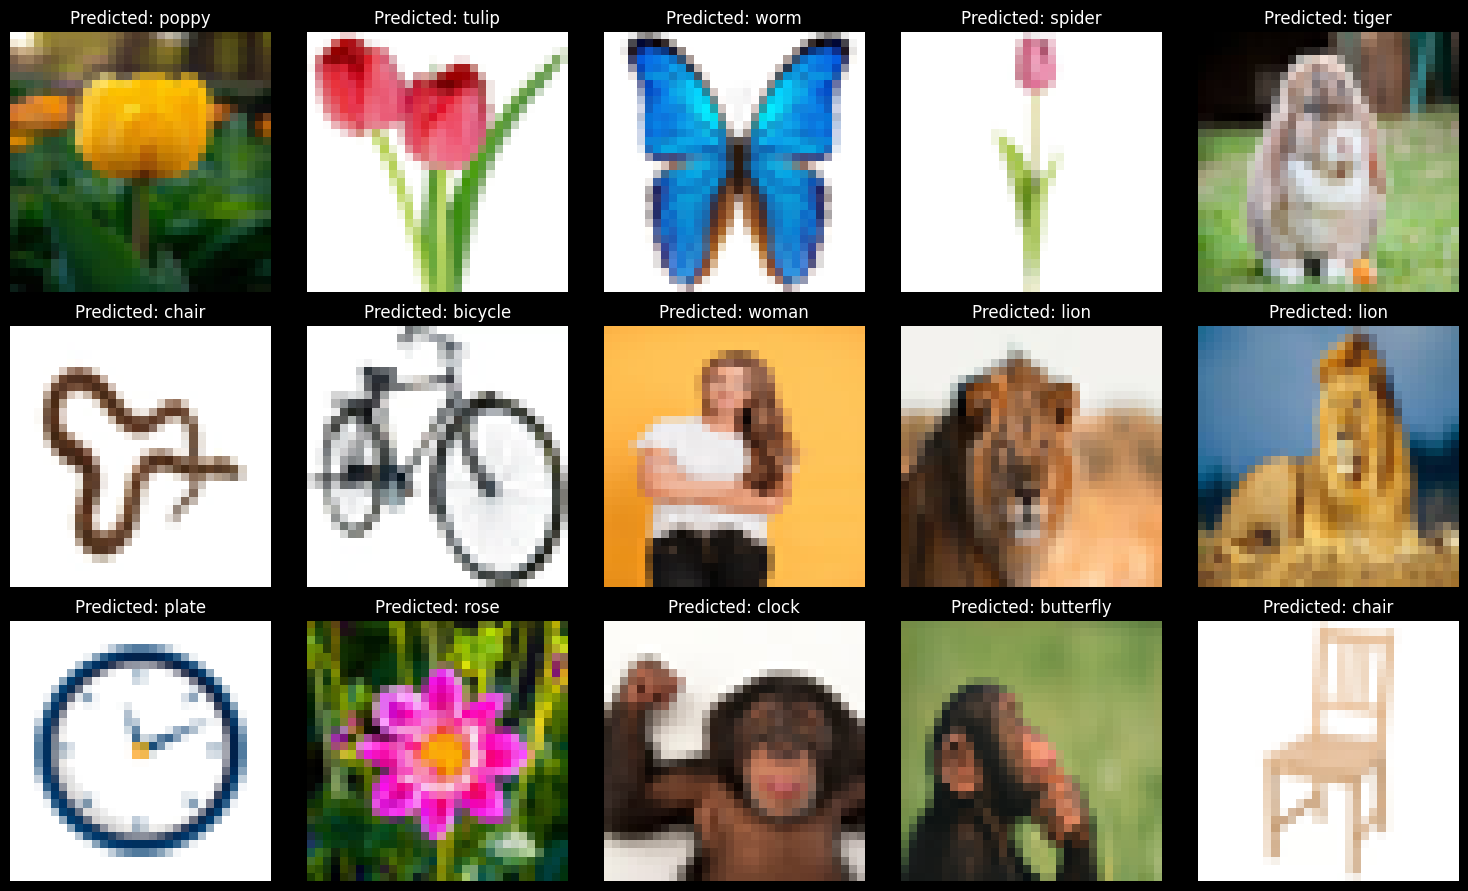

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure normalized_inference_images and deeper_cnn are available from previous cells
if 'normalized_inference_images' not in globals() or not normalized_inference_images.size:
    print("Error: Normalized inference images not found. Please run the previous cell to prepare the images.")
elif 'deeper_cnn' not in globals():
     print("Error: deeper_cnn model not found. Please ensure the model is defined and weights are loaded.")
elif 'inference_image_names' not in globals() or not inference_image_names: # Check for inference_image_names
    print("Error: Inference image names not found. Please ensure the cell processing images is run.")
else:
    # Make predictions
    predictions = deeper_cnn.predict(normalized_inference_images)

    # Get the predicted class indices
    predicted_class_indices = np.argmax(predictions, axis=1)

    # Ensure class_names is defined (from a previous cell)
    if 'class_names' not in globals():
        print("Warning: CIFAR-100 class names not found. Using indices instead of names.")
        predicted_labels = predicted_class_indices
    else:
        # Map predicted indices to class names
        predicted_labels = [cifar100_classes[i] for i in predicted_class_indices]

    # Display images with predicted labels
    num_images = len(normalized_inference_images)
    num_cols = 5 # Adjust as needed
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(15, num_rows * 3))

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(normalized_inference_images[i]) # Display normalized images
        plt.title(f"Predicted: {predicted_labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

### **Results**

We can see that out of 14 unseen images our Deeper CNN model is able to predict 6 images correctly which is not bad.

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (Basic CNN 1 (32-64), Basic CNN 2 (64-128) and Deeper CNN) for classifying images from the CIFAR-100 dataset.

**Summary of Work:**

1.  **Data Preparation:** The CIFAR-100 dataset was loaded, normalized, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Concolutional Neural Network with (32-64) filters, a basic Convolutional Neural Network (CNN) with (64-128) filters, and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Deeper CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Deeper CNN Model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the Basic CNN 1(32-64) and Basic CNN 2 (64-128) models.
*   The **Basic models** performed reasonably well but were outperformed by  Deeper CNN architecture, highlighting the advantage of convolutional layers for image classification tasks.
*   While the Deeper CNN performed best among the tested architectures, the prediction analysis showed that misclassifications still occur, indicating the inherent difficulty of the CIFAR-100 classification task and potential areas for further improvement.
*   The results clearly show the benefits of using Convolutional Neural Networks with techniques like Batch Normalization and Dropout for image classification on a dataset like CIFAR-100.

In conclusion, the Deeper CNN model proved to be the most effective architecture among those tested for the CIFAR-100 classification task. However, achieving higher accuracy would likely require further exploration of more complex architectures, extensive hyperparameter tuning, and potentially data augmentation techniques to address the challenges of subtle class differences and limited data per class.